In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

ModuleNotFoundError: No module named 'numpy'

Load the dataset.

In [2]:
data = pd.read_csv('online_retail.csv')

### How are our sales performing across different product categories?

A <b style="color: red">dashboard</b> displaying key performance indicators (KPIs) such as total sales revenue, sales growth, and sales by product category in the form of bar charts, line graphs, and pie charts.

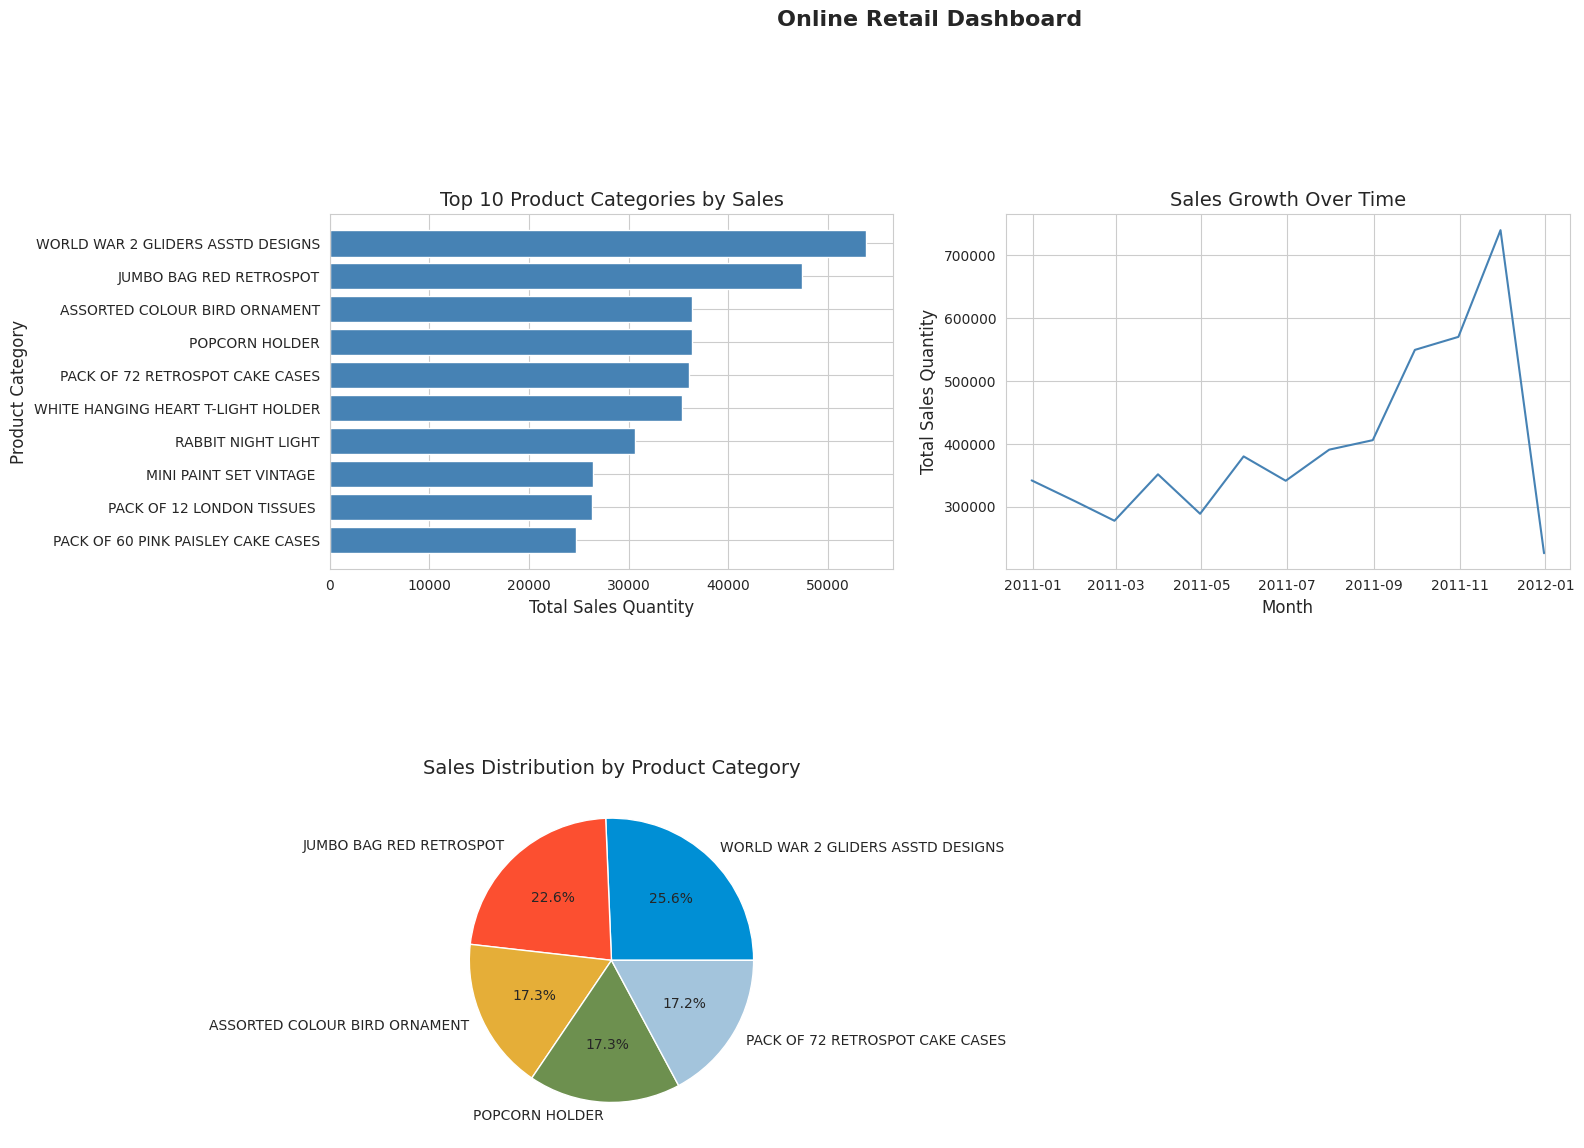

In [3]:
# Create subplots for the dashboard
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.6)

# Group data by product category and calculate total sales revenue
sales_by_category = data.groupby('Description')['Quantity'].sum()

# Plot horizontal bar chart of sales by product category
axes[0, 0].barh(sales_by_category.sort_values(ascending=False).head(10).index,
               sales_by_category.sort_values(ascending=False).head(10).values,
               color='steelblue')
axes[0, 0].set_xlabel('Total Sales Quantity', fontsize=12)
axes[0, 0].set_ylabel('Product Category', fontsize=12)
axes[0, 0].set_title('Top 10 Product Categories by Sales', fontsize=14)
axes[0, 0].invert_yaxis()  # Invert the y-axis for a descending order effect

# Plot line graph of sales growth over time
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
monthly_sales = data.resample('M', on='InvoiceDate')['Quantity'].sum()

axes[0, 1].plot(monthly_sales.index, monthly_sales.values, color='steelblue')
axes[0, 1].set_xlabel('Month', fontsize=12)
axes[0, 1].set_ylabel('Total Sales Quantity', fontsize=12)
axes[0, 1].set_title('Sales Growth Over Time', fontsize=14)

# Plot pie chart of sales distribution by product category
axes[1, 0].pie(sales_by_category.sort_values(ascending=False).head(5).values,
               labels=sales_by_category.sort_values(ascending=False).head(5).index,
               autopct='%1.1f%%',
               colors=['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#a3c4dc'])
axes[1, 0].set_title('Sales Distribution by Product Category', fontsize=14)

# Hide the empty subplot
axes[1, 1].axis('off')

# Add a title to the overall dashboard
fig.suptitle('Online Retail Dashboard', fontsize=16, fontweight='bold', y=1.05)

# Save the dashboard as an image file (optional)
plt.savefig('online_retail_dashboard.png', dpi=300)

# Show the dashboard
plt.show()


### Which geographic regions have the highest concentration of our customers?

A <b style="color: red">heat map</b> showing customer density based on their geographical locations. The intensity of color or shading would represent the concentration of customers in different regions.

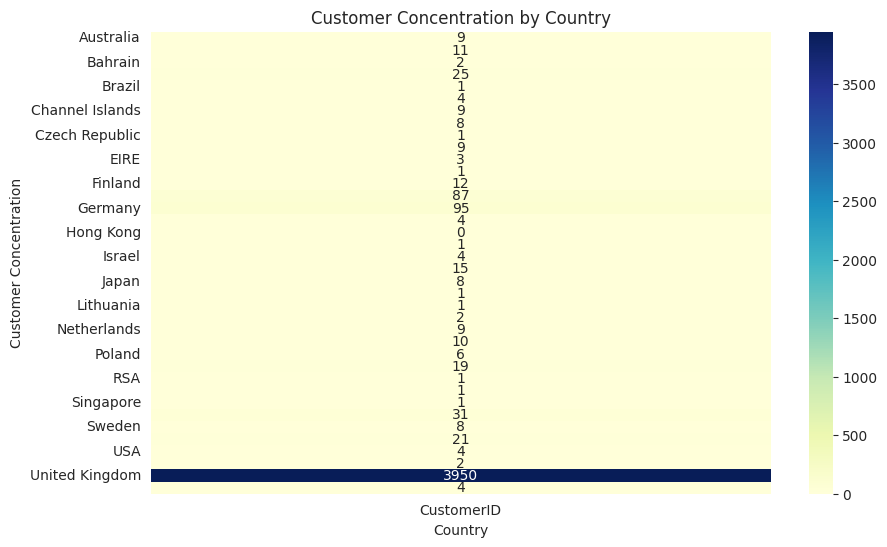

In [4]:
# Group data by country and calculate the number of unique customers
customer_by_country = data.groupby('Country')['CustomerID'].nunique()

# Plotting a heat map for customer concentration by country
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(customer_by_country), cmap='YlGnBu', annot=True, fmt='g')
plt.xlabel('Country')
plt.ylabel('Customer Concentration')
plt.title('Customer Concentration by Country')
plt.show()

### How are our website visitors behaving throughout the day?

 A <b style="color: red">fever chart</b> displaying website traffic and engagement metrics over a 24-hour period. The X-axis represents time, and the Y-axis shows the number of visitors or engagement metrics such as page views, bounce rate, or average session duration.

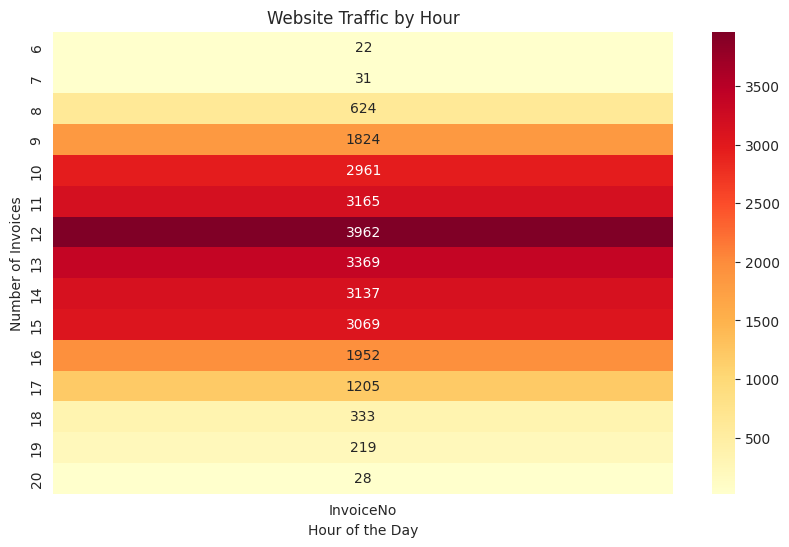

In [5]:
# Extract hour from InvoiceDate
data['Hour'] = data['InvoiceDate'].dt.hour

# Calculate total number of invoices by hour
invoices_by_hour = data.groupby('Hour')['InvoiceNo'].nunique()

# Plot the fever chart
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(invoices_by_hour), cmap='YlOrRd', annot=True, fmt='d')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Invoices')
plt.title('Website Traffic by Hour')
plt.show()

### What is the current customer loyalty rate?

A <b style="color: red">dial gauge</b> displaying the customer loyalty rate as a percentage. The gauge needle would point to the corresponding loyalty rate on a scale from 0% to 100%, providing an instant visual representation of customer loyalty.

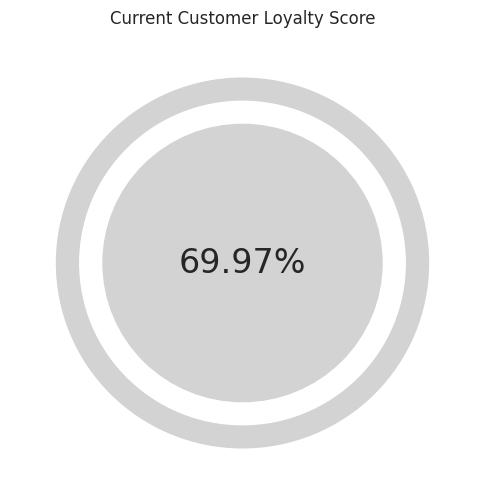

In [6]:
# Calculate the total number of unique customers
total_customers = data['CustomerID'].nunique()

# Calculate the number of customers who made repeat purchases
repeat_customers = data.groupby('CustomerID')['InvoiceNo'].nunique().gt(1).sum()

# Calculate the loyalty score or customer retention rate
loyalty_score = (repeat_customers / total_customers) * 100

# Creating a dial gauge to display the current customer loyalty score
plt.figure(figsize=(6, 6))
plt.gca().add_patch(plt.Circle((0.5, 0.5), 0.4, color='lightgray'))
plt.gca().add_patch(plt.Circle((0.5, 0.5), 0.35, color='white'))
plt.gca().add_patch(plt.Circle((0.5, 0.5), 0.3, color='lightgray'))
plt.text(0.5, 0.5, f'{loyalty_score:.2f}%', ha='center', va='center', fontsize=24)
plt.axis('off')
plt.title('Current Customer Loyalty Score')
plt.show()

In [11]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8


Pattern Mining (Association Rule Mining)

In [7]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Preprocess the data (if required)

# Perform association rule mining
frequent_itemsets = apriori(data, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Print the discovered rules
print(rules.head())

/home/waks/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 536365

Predictive Analysis:

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Preprocess the data (if required)

# Split the dataset into features and target variable
X = data.drop("target_variable_column", axis=1)
y = data["target_variable_column"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a predictive model (e.g., Random Forest Classifier)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


KeyError: "['target_variable_column'] not found in axis"

Cluster Formation:

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Preprocess the data (if required)

# Select relevant features for clustering
features = data[["feature1", "feature2", ...]]

# Perform clustering (e.g., K-Means)
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(features)

# Add the cluster labels back to the dataset
data["Cluster"] = clusters

# Analyze the clusters
cluster_stats = data.groupby("Cluster").mean()
print(cluster_stats)


Rules Mining:

In [ ]:
from pyarc import TransactionDB
from pyarc import CBA

# Preprocess the data (if required)

# Convert the dataset into a transaction database
transactions = TransactionDB.from_DataFrame(data)

# Perform rule mining (e.g., Classification Based on Associations)
cba = CBA(support=0.1, confidence=0.5)
cba.fit(transactions)

# Print the discovered rules
print(cba.rules())


Sequence Discovery:

In [12]:
from prefixspan import PrefixSpan

# Preprocess the data (if required)

# Extract sequences of product IDs or other relevant events
sequences = data.groupby("CustomerID")["StockCode"].apply(list).tolist()

# Perform sequence mining using PrefixSpan
ps = PrefixSpan(sequences)
frequent_sequences = ps.frequent(3)

# Print the frequent sequences
for sequence in frequent_sequences:
    print(sequence)

KeyboardInterrupt: 